# Analyse

### import bibliothèques

In [1738]:
# pour la manipulation des données
import pandas as pd

# pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# pour les tests statistiques
from scipy.stats import chi2_contingency, f_oneway, kruskal, kstest, shapiro, anderson, mannwhitneyu, ttest_ind, spearmanr, chi2

# pour la regression linéaire
from statsmodels.formula.api import ols

# pour les transformations
from math import log as ln
from math import sqrt

### import du csv

In [1739]:
df_assurance = pd.read_csv("csv/cleaning_assurance.csv")
df_assurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analyse univariée

### Variables Catégorielles

#### Genre

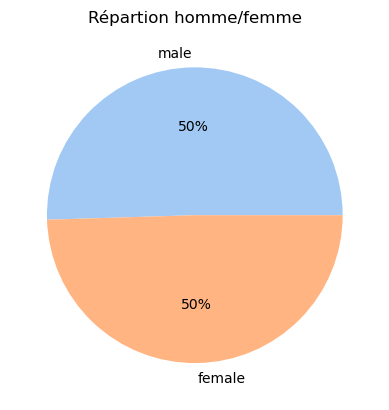

In [1740]:
colors = sns.color_palette('pastel')
labels=['male','female']
plt.pie(df_assurance['sex'].value_counts(), colors = colors, labels=labels, autopct = '%0.0f%%')
plt.title('Répartion homme/femme')
plt.show()

#### Fumeurs

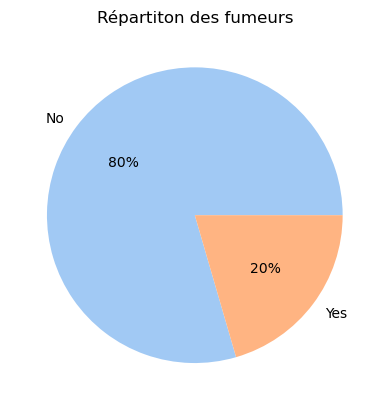

In [1741]:
colors = sns.color_palette('pastel')
labels=['No','Yes']
plt.pie(df_assurance['smoker'].value_counts(), colors = colors, labels=labels, autopct = '%0.0f%%')
plt.title('Répartiton des fumeurs')
plt.show()

#### Children

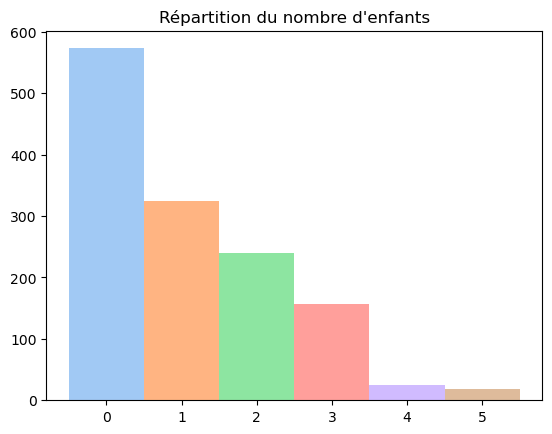

In [1742]:
colors = sns.color_palette('pastel')
labels=[0,1,2,3,4,5]
plt.bar(labels,df_assurance['children'].value_counts(), color = colors, width=1)
plt.title("Répartition du nombre d'enfants")
plt.show()

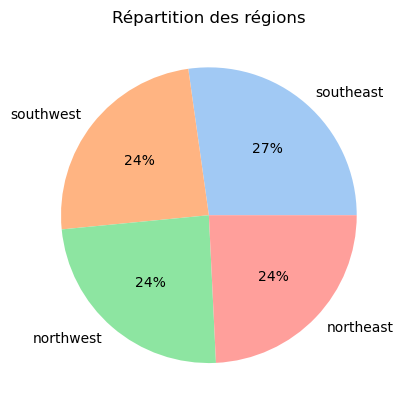

In [1743]:
colors = sns.color_palette('pastel')
labels=["southeast","southwest","northwest","northeast"]
plt.pie(df_assurance['region'].value_counts(), colors = colors, labels=labels, autopct = '%0.0f%%')
plt.title("Répartition des régions")
plt.show()

### Variables Quantitatives

In [1744]:
df_quantitatif= df_assurance[['age','bmi','charges']]
df_quantitatif

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1332,50,30.970,10600.54830
1333,18,31.920,2205.98080
1334,18,36.850,1629.83350
1335,21,25.800,2007.94500


### Charges, Age et BMI et leurs analyses bivariées entre elles

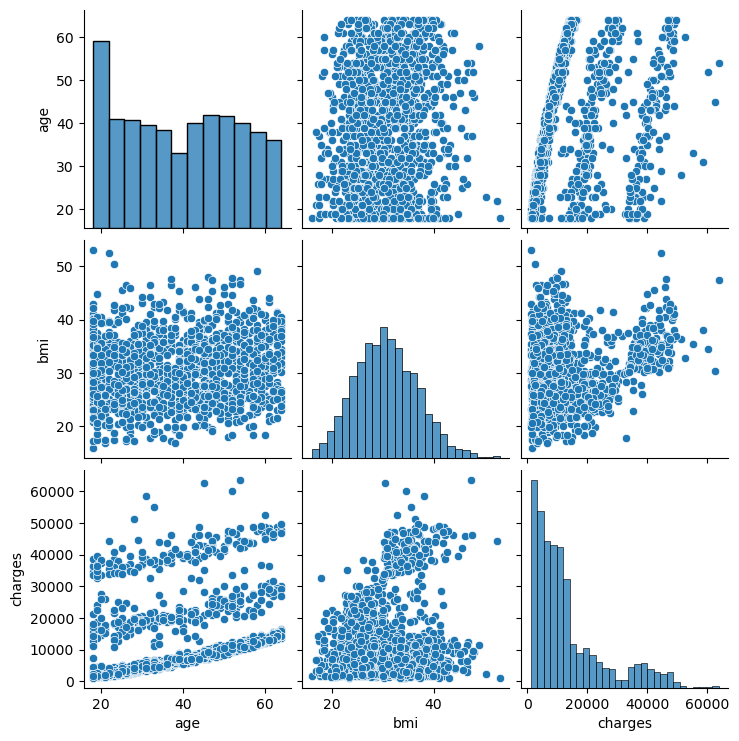

In [1745]:
sns.pairplot(df_quantitatif)

La variable age prend 47 valeurs différentes. On souhaite afficher la distribution avec 47 bins

#### Age

<Figure size 1800x700 with 0 Axes>

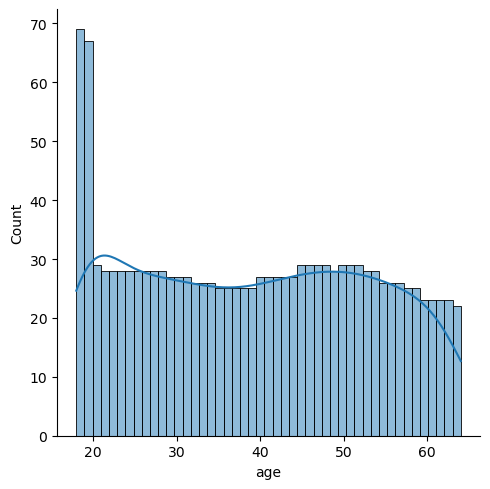

In [1746]:
plt.figure(figsize=[18,7])
sns.displot(data=df_assurance,x="age", kde=True, bins=df_assurance['age'].unique().size)
plt.show()

La distribution semble uniforme avec deux piques pour les ages 18 et 19 ans dont le nombre de valeurs est plus de deux fois supérieur aux nombre de valeurs des autres ages. <br> On peut penser que des mineurs renseignent l'âge minimun obligatoire.


#### BMI

In [1747]:
# coeff asymétrie de Pearson
print(df_assurance.bmi.skew())

# coeff applatissement de Fisher
print(df_assurance.bmi.kurtosis())

0.28391419385321137
-0.052947204436257334


Le coefficient d'asymétrie de Pearson est légèrement supérieur à 0. Cela montre un petit décalage vers la droite et s'apparente à une loi normale. <br> Le coefficient d'applatissement de Fisher est très proche de 0. Cette étude ne permet pas de repousser l'hypothèse de normalité. <br>

In [1748]:
# moyenne
print(df_assurance.bmi.mean())

# médiane
print(df_assurance.bmi.median())

# mode
print(df_assurance.bmi.mode()[0])

# écart-type
print(df_assurance.bmi.std())

30.66345175766642
30.4
32.3
6.100468409615801


La <strong> moyenne </strong>, la <strong> médiane </strong> et le <strong> mode </strong> sont très proche les uns des autres. <i> Cette étude ne permet pas de repousser l'hypothèse de normalité </i>. <br>
On effectue le test de Kolmogorov-smirnov

In [1749]:
print(kstest(df_assurance['bmi'], 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


Il existe une <strong> différence significative </strong> entre les deux distributions de données comparées.

On a choisi d'effectuer une transformation racine carrée en vu d'obtenir une distribution normale car elle est la plus adaptée lorsque les données sont distribuées de manière asymétrique.

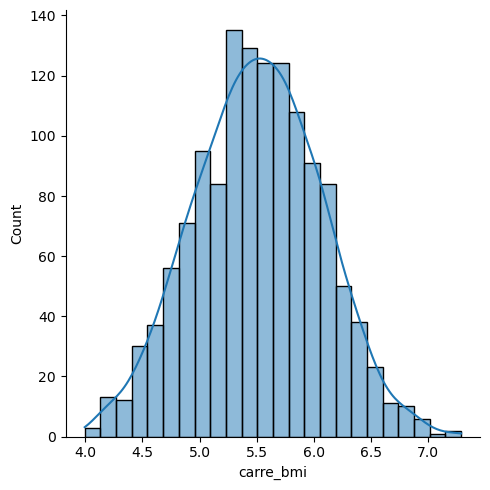

In [1750]:
df_assurance['carre_bmi']= df_assurance['bmi'].apply(lambda x : sqrt(x))
sns.displot(data=df_assurance,x="carre_bmi", kde=True)

In [1751]:
# coeff asymétrie de Pearson
print(df_assurance.carre_bmi.skew())

0.014227029512812276


La transformation a corrigé la legère asymétrie de la distribution

In [1752]:
stat, p = shapiro(df_assurance['carre_bmi'])
print('Statistic=%.3f, p=%.3f' % (stat, p))

Statistic=0.999, p=0.339


On ne rejette pas l'hypothèse de la normalité de la distribution des racines carrées de bmi

#### Charges

La courbe de distribution des charges à une allure d'exponentielle décroissante. On voit aussi clairement sur le boxplot que la médiane ne se trouve pas au centre de la boîte et est donc différente de la moyenne. On peut rejeter l'hypothèse de normalité. <br><br> On choisit d'effectuer une transformation logarithmique pour tenter d'obtenir une distribution normale car lorsque des valeurs très faibles et très élevées sont présentes dans la même distribution, cette méthode permet de rapprocher les valeurs extrêmes de la distribution vers une distribution plus proche de la normale. Elle est également adaptée aux distributions qui ont une forme de longue queue ou qui sont très asymétriques.

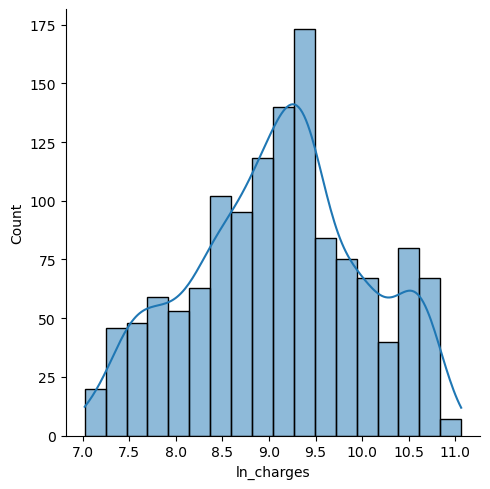

In [1753]:
df_assurance['ln_charges']= df_assurance['charges'].apply(lambda x : ln(x))
sns.displot(data=df_assurance,x="ln_charges", kde=True)

In [1754]:
# coeff asymétrie de Pearson
print(df_assurance.ln_charges.skew())

# coeff applatissement de Fisher
print(df_assurance.ln_charges.kurtosis())

# moyenne
print(df_assurance.ln_charges.mean())

# médiane
print(df_assurance.ln_charges.median())

# mode
print(df_assurance.ln_charges.mode()[0])

-0.08983863481292871
-0.6345786370879938
9.099927595278572
9.1469916813761
7.02275569117477


La courbe de distribution de l'IMC bmi fait penser à une courbe de distribution normale. <br> On effectue le test de normalité de Shapiro-Wilk pour vérifier si les données suivent une loi normale. <br> J'ai choisi le test de <strong> Shapiro-Wilk </strong> car il  est très sensible et capable de détecter même des faibles déviations par rapport à une distribution normale. Il teste l'hypothèse nulle selon laquelle un échantillon est issu d'une population normalement distribuée. <br> <ul> <li> 1. Les données doivent être réparties normalement ou presque normalement </li> <li> 2. Les données doivent être indépendantes et régulières (les données de l'échantillon ne doivent pas être corrélées) </li> <li> Les données doivent être continues. </li> <li> 4. L'échantillon doit être assez grand. Les règles générales disent que l'échantillon doit comporter au moins 15 observations. </li>


In [1755]:
stat, p = shapiro(df_assurance['ln_charges'])
print('chapiro=%.3f, p=%.3f' % (stat, p))

chapiro=0.983, p=0.000


Le test de Shapiro-Wilk n'est pas significatif. Il indique que la distribution n'est pas normale. Le nombre d'anomalies peut avoir un impact sur la précision et la fiabilité des résultats. <br> On choisit d'utiliser le test de Kolmogorov-Smirnov car il offre des résultats précis et fiables. Il est robuste et n'est pas affecté par les outliers. <br> Il compare les distributions empiriques et théoriques, mesure la distance entre elles et détermine si elles sont assez différente.

In [1756]:
print(kstest(df_assurance['ln_charges'], 'norm'))

KstestResult(statistic=0.9999999999989123, pvalue=0.0)


La distribution n'est pas normale

## Analyse bivariées

### Corrélation en variables quantitative et catégorielle

#### BMI et Régions

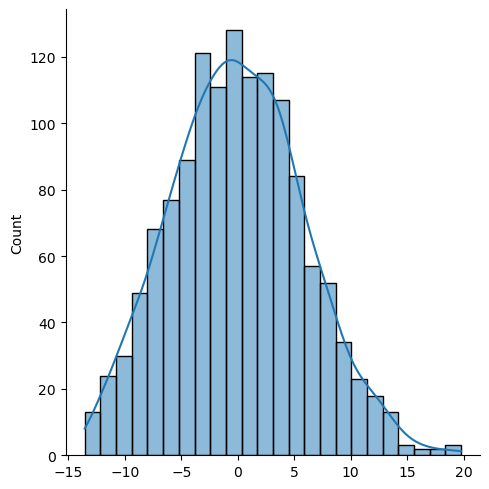

In [1757]:
model = ols('bmi ~ C(region)', data=df_assurance[['bmi','region']]).fit()
sns.displot(model.resid, kde=True)

In [1758]:
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     39.49
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.91e-24
Time:                        00:49:48   Log-Likelihood:                -4257.5
No. Observations:                1337   AIC:                             8523.
Df Residuals:                    1333   BIC:                             8544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 29.1735      0.325     89.722      0.000      28.536      29.811
C(region)[T.northwest]     0.0220      0.460      0.048      0.962      -0.880       0.924
C(region)[T.southeast]     4.1825      0.447      9.356      0.000       3.306       5.059
C(region)[T.southwest]     1.4231      0.459      3.097      0.002       0.522       2.325
==============================================================================
Omnibus:                        9.807   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.604
Skew:                           0.182   Prob(JB):                      0.00821
Kurtosis:                       2.801   Cond. No.                         4.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ce résultat indique que le modèle OLS a été utilisé pour prédire la variable dépendante bmi. <br>
Le coefficient de détermination (R-squared) est de 0,082, ce qui signifie que seulement 8,2% de la variance de la variable dépendante peut être expliquée par le modèle. <br>
Le F-statistique est de 39,49, ce qui indique que le modèle est statistiquement significatif. Les coefficients de régression montrent que la région a un effet significatif sur le bmi, avec les régions du nord-ouest, du sud-est et du sud-ouest ayant des effets différents. <br>
Les tests d'omnibus et de Jarque-Bera montrent que la distribution des résidus n'est pas normale La probabilité associée à la somme des carrés des résidus est inférieure à 0,05. <br>
Le test de Jarque-Bera est très sensible aux différences entre les distributions normales et non normales et est robuste aux valeurs aberrantes et aux distributions non symétriques. <br>



D’après le Théorème Central Limite, même si des données individuelles ne suivent pas une loi normale, une moyenne issue de ces données suivra, elle, une loi normale, à condition que l’échantillon collecté soit suffisamment grand.

L'ANOVA peut être utilisé si la distribution n'est pas normale, si plusieurs facteurs sont vérifiés. <ul> <li> Les données doivent être indépendantes. </li> <li> Les variances des différents groupes sont similaires. </li> <li> Les résidus sont homogènes. </li> </ul>

In [1759]:
def get_group_names(category):
    catSerie = df_assurance[category]
    group_names = [group for group in catSerie.unique()]
    return group_names

def byGroup(quantitatif,category):
    qSerie = df_assurance[quantitatif]
    catSerie = df_assurance[category]
    group_names = get_group_names(category)
    byGroup = [qSerie[catSerie == group] for group in group_names]
    return byGroup

def stdByGroup(quantitatif,category):
    varByGroupes = byGroup(quantitatif,category)
    return [group.std() for group in varByGroupes]
    
def print_std(quantitatif,category):
    group_names = get_group_names(category)
    for std,group_name in zip(stdByGroup(quantitatif,category),get_group_names(category)):
        print('l\'écart-type pour le groupe ' + group_name + ' :', std)

def pByGroup(quantitatif,category):
    varByGroupes = byGroup(quantitatif,category)
    return [shapiro(group)[1] for group in varByGroupes]

def print_p(quantitatif,category):
    group_names = get_group_names(category)
    for p,group_name in zip(pByGroup(quantitatif,category),get_group_names(category)):
        print('Valeur de p pour le groupe ' + group_name + ' :', p)



In [1760]:
category='region'
quantitatif='bmi'
print_std(quantitatif,category)
print_p(quantitatif,category)

l'écart-type pour le groupe southwest : 5.6918357918918705
l'écart-type pour le groupe southeast : 6.477647930431439
l'écart-type pour le groupe northwest : 5.144127109454823
l'écart-type pour le groupe northeast : 5.93751330426977
Valeur de p pour le groupe southwest : 0.3629520535469055
Valeur de p pour le groupe southeast : 0.02704481966793537
Valeur de p pour le groupe northwest : 0.45635268092155457
Valeur de p pour le groupe northeast : 0.07962298393249512


 en affichant les valeurs p pour chaque région, on voit que la colonne bmi suit une distribution normale par région.

<ul>
<li> les données sont indépendantes car l'appartenance d'une imc à l'une ou l'autre des régions n'affecte pas l'appartenance d'une autre IMC à une autre région </li>
<li> les résidus sont homogènes car la p-value est supérieur 0.05 pour chaque région avec le test de shapiro</li>
<li> les variances sont similaires </li>
</ul>

On peut appliquer le test d'ANOVA pour determiner les effets de la variable région sur les charges 

In [1761]:
bmiByRegion = byGroup(quantitatif,category)
stat, p = f_oneway(*bmiByRegion)
print('ANOVA: %.3f, p-value: %.3f' % (stat, p))

ANOVA: 39.486, p-value: 0.000


la p-value est inférieur à 0.05 <br>
on rejette L'hypothèse nulle que les moyennes des groupes sont égales <br>
Il n'y a pas de corrélation entre la région et la charge

#### Charges et Région

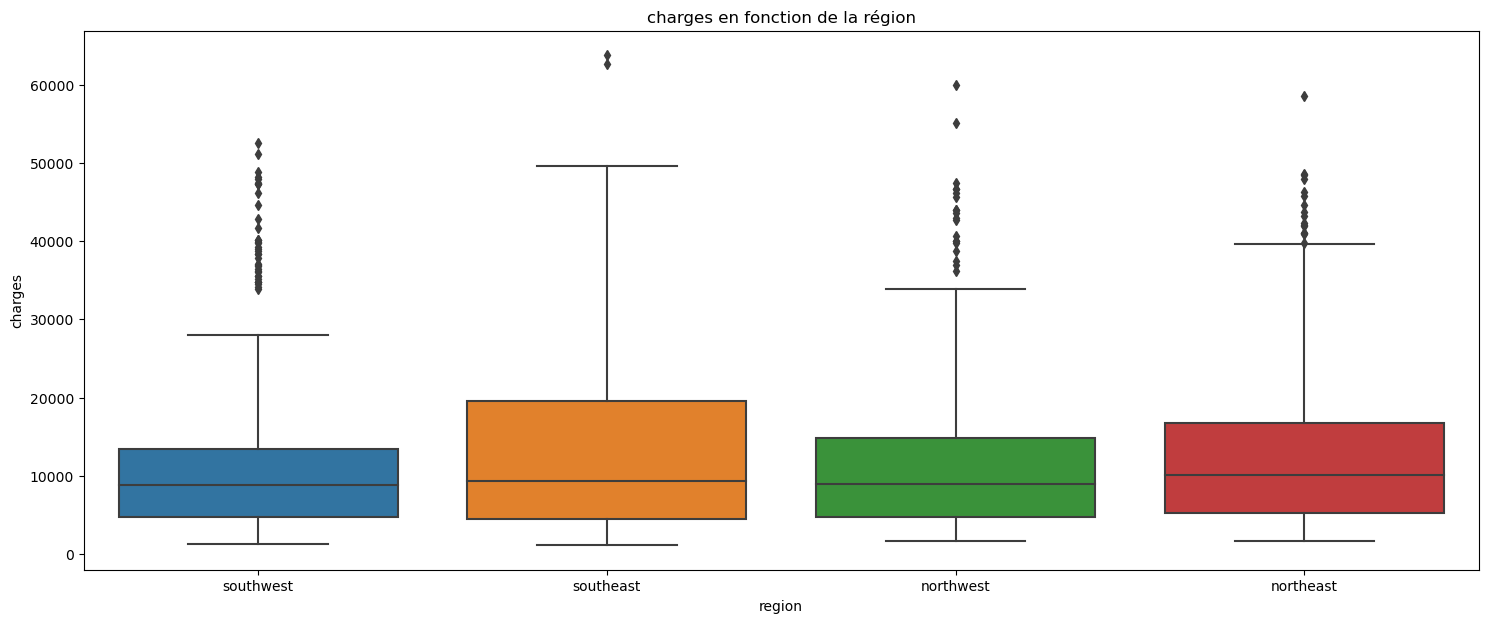

In [1762]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de la région")
sns.boxplot(data = df_assurance, x="region", y="charges", whis=2)
plt.show()

In [1763]:
model = ols('charges ~ C(region)', data=df_assurance[['charges','region']]).fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.926
Date:                Thu, 12 Jan 2023   Prob (F-statistic):             0.0328
Time:                        00:49:49   Log-Likelihood:                -14462.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1333   BIC:                         2.895e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.341e+04    671.347     19.969      0.000    1.21e+04    1.47e+04
C(region)[T.northwest]  -955.5437    949.429     -1.006      0.314   -2818.081     906.994
C(region)[T.southeast]  1329.0269    922.977      1.440      0.150    -481.619    3139.673
C(region)[T.southwest] -1059.4471    948.698     -1.117      0.264   -2920.551     801.657
==============================================================================
Omnibus:                      326.990   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.236
Skew:                           1.483   Prob(JB):                    7.64e-136
Kurtosis:                       4.539   Cond. No.                         4.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1764]:
category='region'
quantitatif='charges'
print_std(quantitatif,category)
print_p(quantitatif,category)

l'écart-type pour le groupe southwest : 11557.179100748781
l'écart-type pour le groupe southeast : 13971.098588991748
l'écart-type pour le groupe northwest : 11073.125698977345
l'écart-type pour le groupe northeast : 11255.803065578471
Valeur de p pour le groupe southwest : 2.023667803366432e-20
Valeur de p pour le groupe southeast : 1.23268419436607e-19
Valeur de p pour le groupe northwest : 4.660646280841348e-19
Valeur de p pour le groupe northeast : 6.552730011610829e-18


les résidus ne sont pas homogènes car la p-value est inférieur 0.05 pour chaque région avec le test de shapiro. <br>
cela signifie que le modèle ne s'adapte pas de manière uniforme aux données et que les résultats peuvent être biaisés. <br>
Si l'un de ces facteurs est incohérent, il est préférable d'utiliser une méthode non paramétrique, comme le test de de kruskal

In [1765]:
chargesbyRegion = byGroup(quantitatif,category)
stat, p = kruskal(*chargesbyRegion)
print('Kruskal: %.3f, p-value: %.3f' % (stat, p))

Kruskal: 4.623, p-value: 0.202


p-value est supérieur à 0.05 donc on rejette l'hypothèse que les différences observées entre les groupes sont dues au hasard

#### Charges et Genre

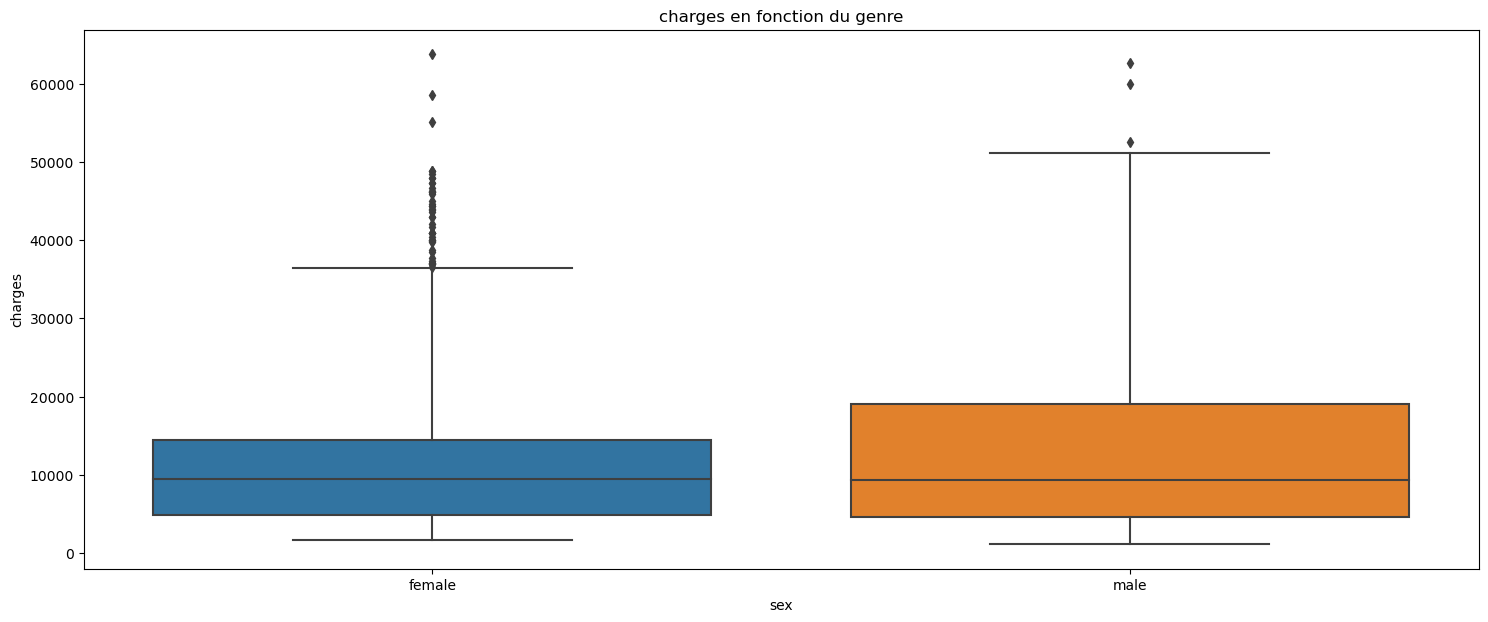

In [1766]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction du genre")
sns.boxplot(data = df_assurance, x="sex", y="charges",whis=2.3)
plt.show()

Pour effectuer le t test dans le cas ou les données ne sont pas normalement distribuées
<ul>
<li> les échantillons doivent être suffisamment grands et les données doivent être mesurées à l'aide d'une échelle quantitative. </li>
<li> Les échantillons doivent être indépendants. </li>
<li> Les données doivent être suffisamment variées et l'échantillon doit être suffisamment grand pour que le test soit significatif. </li>
</ul>

In [1767]:
print(df_assurance['charges'].std())
print(df_assurance['charges'].mean())
print(df_assurance['charges'].min())
print(df_assurance['charges'].max())

12110.359656344179
13279.121486655948
1121.8739
63770.42801


In [1768]:
category='sex'
quantitatif='charges'
print_std(quantitatif,category)
print_p(quantitatif,category)

l'écart-type pour le groupe female : 11128.703800915431
l'écart-type pour le groupe male : 12971.958662967083
Valeur de p pour le groupe female : 1.830527656441053e-27
Valeur de p pour le groupe male : 1.270790746325303e-26


Les groupes ne sont pas normalement distribués. On ne peut pas utiliser le t test. On effectue le test de MannWhitneyyU

In [1769]:
sexByCharges = byGroup(quantitatif,category)
stat, p = mannwhitneyu(*sexByCharges)
print(stat)
print(p)

220652.0
0.6944793894954917


Il y a une correlation entre le genre et les charges

#### Charges et Fumeurs

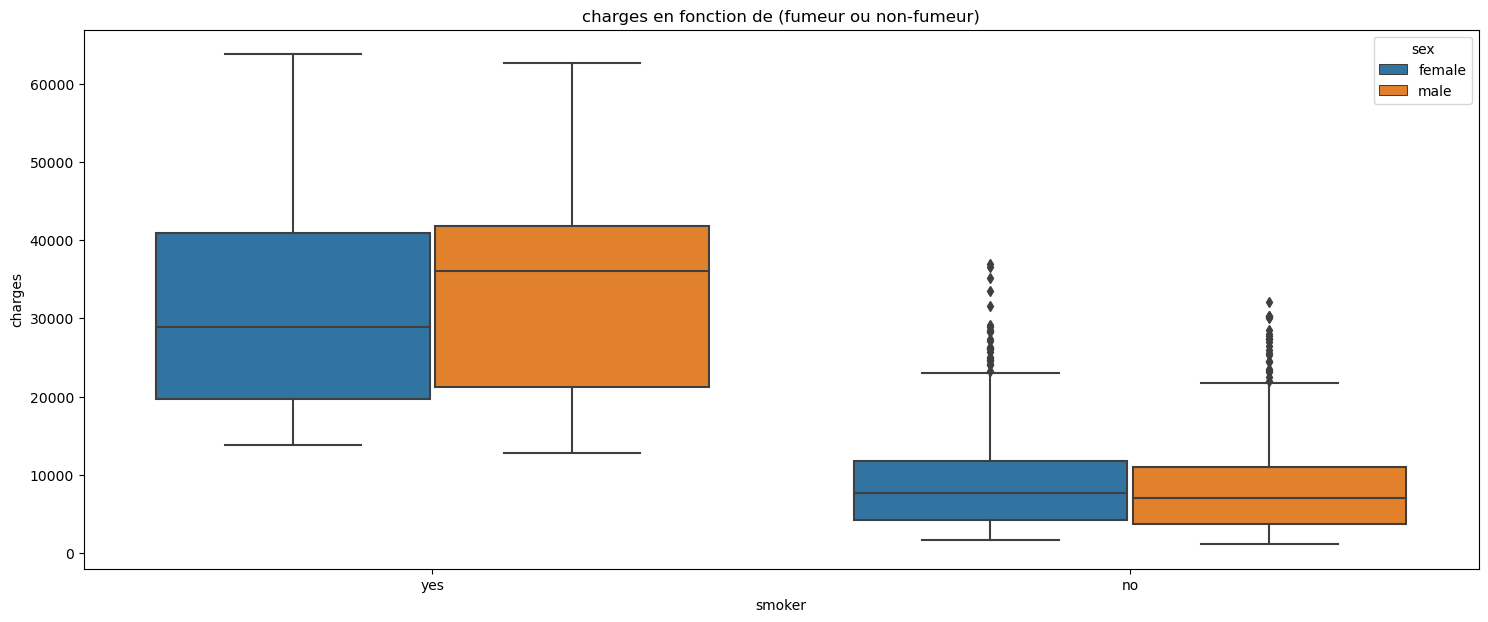

In [1770]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de (fumeur ou non-fumeur)")
sns.boxplot(data = df_assurance, x="smoker", y="charges", hue='sex')
plt.show()

In [1771]:
category='smoker'
quantitatif='charges'
print_std(quantitatif,category)
print_p(quantitatif,category)

l'écart-type pour le groupe yes : 11541.547175589121
l'écart-type pour le groupe no : 5992.973800106524
Valeur de p pour le groupe yes : 3.6255991542333277e-09
Valeur de p pour le groupe no : 1.503623581761669e-28


On ne peut pas faire de t test

In [1772]:
smokerByCharges = byGroup(quantitatif,category)
stat, p = mannwhitneyu(*smokerByCharges)
# stat, p = ttest_ind(smoker_charges, no_smoker_charges)
print(stat)
print(p)

# Afficher les résultats

283859.0
5.74701188239214e-130


On ne rejette pas l'hypothèse nulle qui dit que les moyennes des deux groupes sont égales. Autrement dit, il n'y a pas de différence significative entre les moyennes des deux groupes.

#### Charges et Children

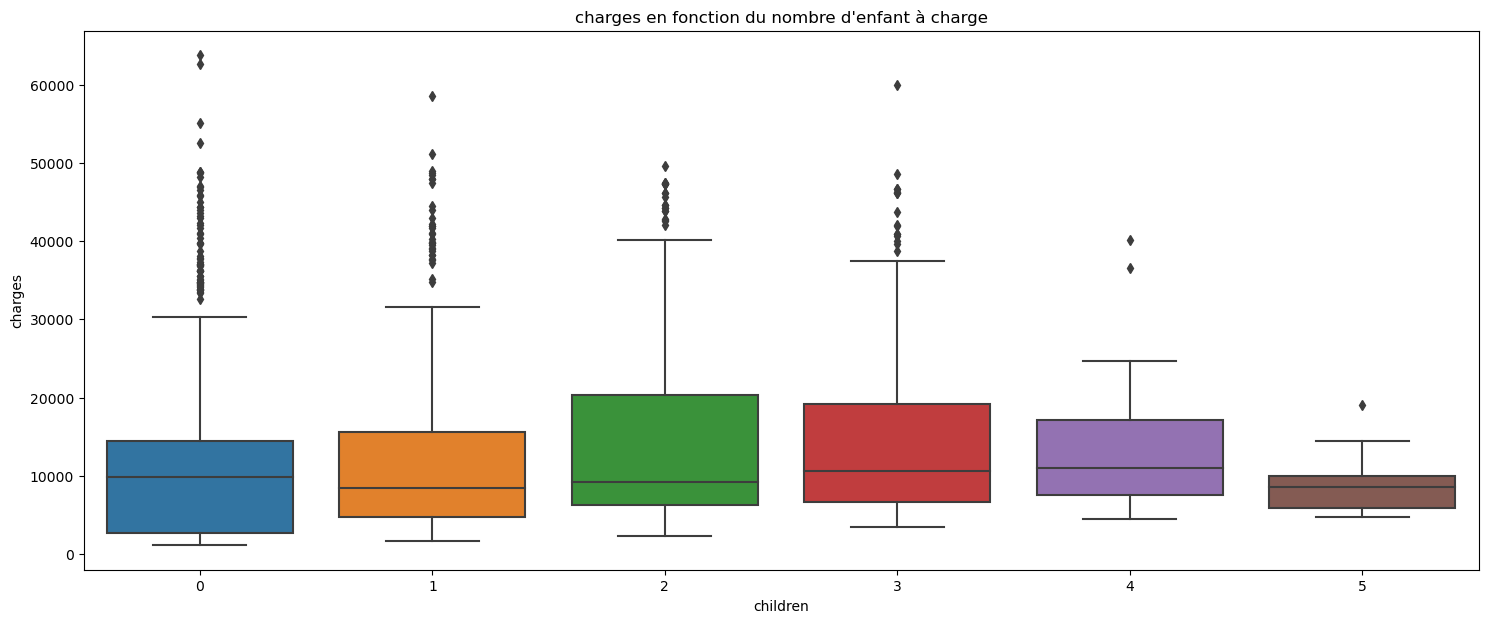

In [1773]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction du nombre d'enfant à charge")
sns.boxplot(data = df_assurance, x="children", y="charges")
plt.show()

In [1774]:
childrens = [children for children in df_assurance['children'].unique()]
chargesSeriesPerChildren = [chargesSerie[df_assurance['children'] == children] for children in childrens]
stat, p = kruskal(*chargesSeriesPerChildren)
print('Kruskal: %.3f, p-value: %.3f' % (stat, p))
# on rejette h0

Kruskal: 29.121, p-value: 0.000


### BMI et Smoker

In [1775]:
sexs = [sex for sex in df_assurance['sex'].unique()]
bmiSerie = df_assurance['bmi']
bmiSeriesPersex = [bmiSerie[df_assurance['sex'] == sex] for sex in sexs]

print(bmiSeriesPersex[0].std())
print(bmiSeriesPersex[1].std())

stat1, p1 = shapiro(bmiSeriesPersex[0])
stat2, p2 = shapiro(bmiSeriesPersex[1])

# Afficher les valeurs de p
print('Valeur de p pour le groupe homme :', p1)
print('Valeur de p pour le groupe femme :', p2)

6.046023085745338
6.144973069550209
Valeur de p pour le groupe homme : 0.003545489627867937
Valeur de p pour le groupe femme : 0.003164957743138075


In [1776]:
smoker_bmi = df_assurance.loc[df_assurance['smoker'] == 'yes', 'bmi'].values
no_smoker_bmi = df_assurance.loc[df_assurance['smoker'] == 'no', 'bmi'].values
t_stat, p_value = ttest_ind(smoker_bmi, no_smoker_bmi)

# Afficher les résultats
print("Statistique t:", t_stat)
print("Valeur p:", p_value)

Statistique t: 0.13687893088832626
Valeur p: 0.8911471317222854


### Corrélation entre variables quantitatives

les distributions des variables ne suivent pas une loi normale. On utilise le coefficient de Spearman 

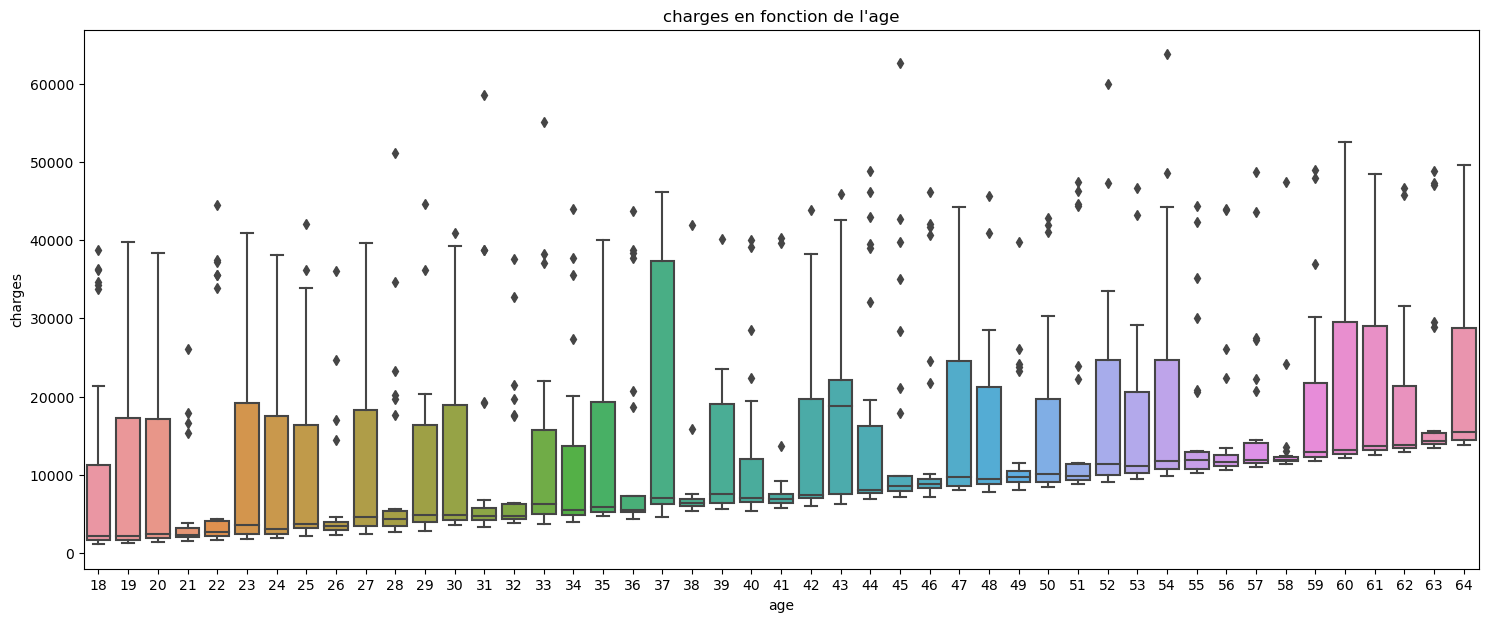

In [1777]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de l'age")
sns.boxplot(data = df_assurance, x="age", y="charges")
plt.show()

In [1778]:
df_assurance.age.describe()[:]

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [1779]:
coeff, p_value = spearmanr(df_assurance['age'], df_assurance['charges'])
print('Coefficient de Spearman: %0.3f' % coeff)
print('P-value: %0.3f' % p_value)
df_assurance['age'].corr(df_assurance['charges'])

Coefficient de Spearman: 0.534
P-value: 0.000


0.2983082125097863

In [1780]:
def get_grade(bmi) :
    if bmi < 30:
        return 'underweight/good'
    if bmi >= 30 :
        return 'overweight/obesity'

df_assurance['grade'] = df_assurance['bmi'].apply(lambda x: get_grade(x))

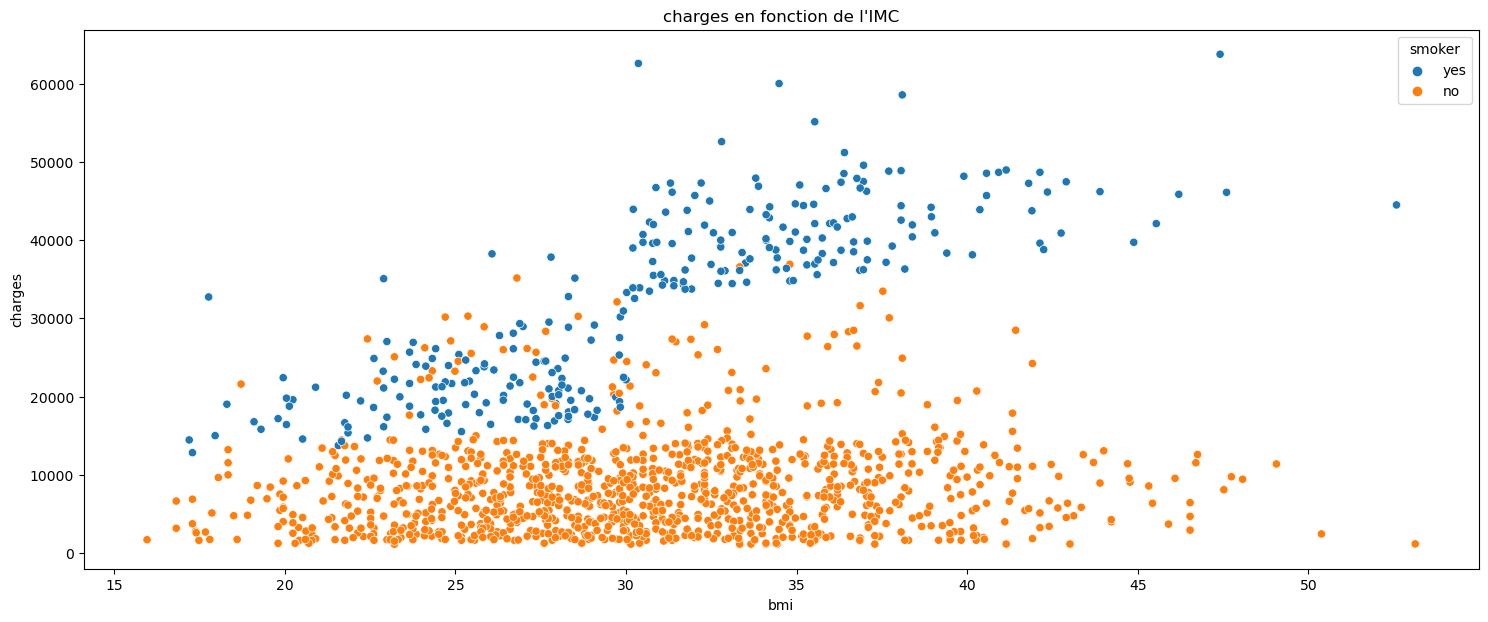

In [1781]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de l'IMC")
sns.scatterplot(data = df_assurance, x="bmi", y="charges", hue="smoker")
plt.show()

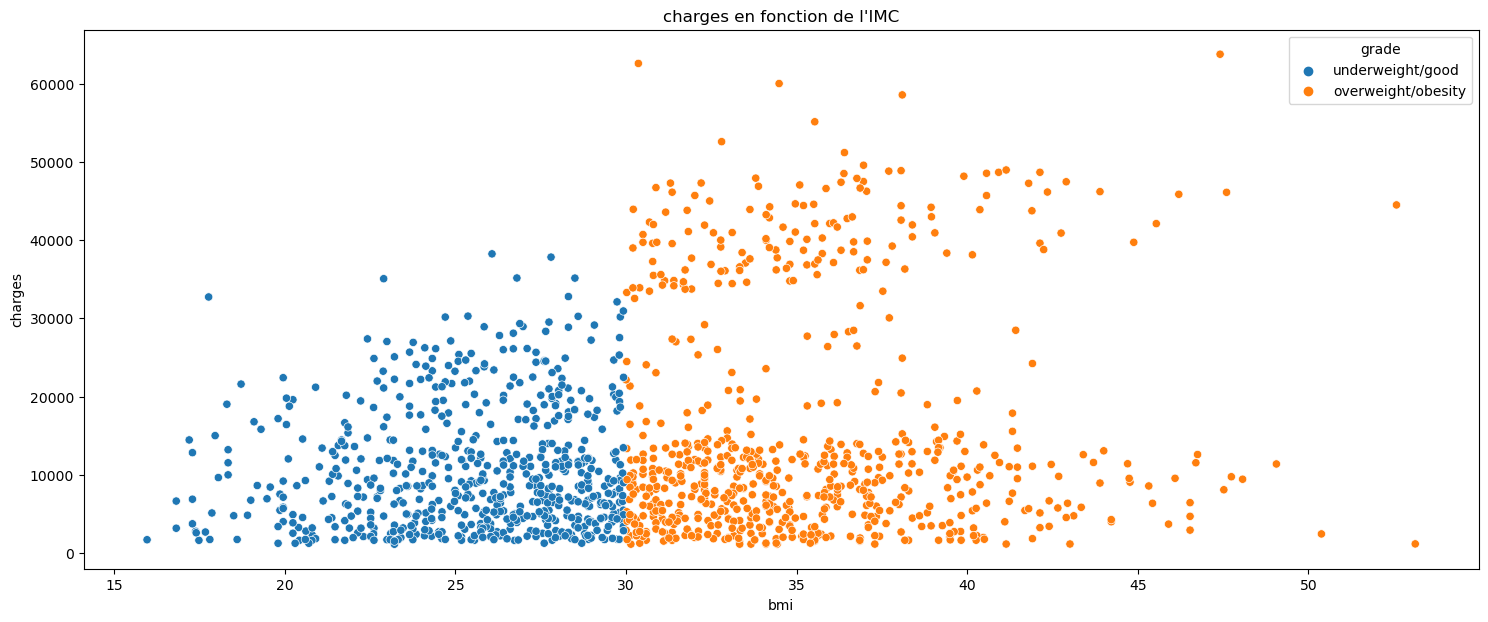

In [1782]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de l'IMC")
sns.scatterplot(data = df_assurance, x="bmi", y="charges", hue="grade")
plt.show()

In [1783]:
coeff, p_value = spearmanr(df_assurance['bmi'], df_assurance['charges'])
print('Coefficient de Spearman: %0.3f' % coeff)
print('P-value: %0.3f' % p_value)
df_assurance['bmi'].corr(df_assurance['charges'])

Coefficient de Spearman: 0.120
P-value: 0.000


0.19840083122624935

In [1784]:
coeff, p_value = spearmanr(df_assurance['age'], df_assurance['bmi'])
print('Coefficient de Spearman: %0.3f' % coeff)
print('P-value: %0.3f' % p_value)
df_assurance['bmi'].corr(df_assurance['age'])

Coefficient de Spearman: 0.108
P-value: 0.000


0.10934361041896884

### en fonction de charges

### Entre attributs catégoriels

In [1785]:
contingency_table = pd.crosstab(df_assurance['grade'],df_assurance['smoker'])
contingency_table

smoker,no,yes
grade,,
overweight/obesity,561,145
underweight/good,502,129


<AxesSubplot:xlabel='smoker', ylabel='grade'>

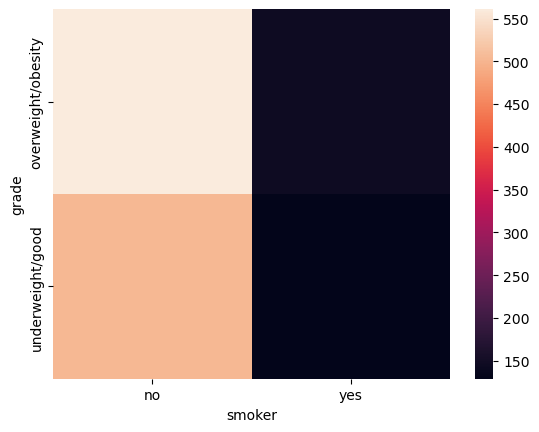

In [1786]:
sns.heatmap(contingency_table)

In [1787]:
contingency_table = pd.crosstab(df_assurance['grade'],df_assurance['children'])
contingency_table

children,0,1,2,3,4,5
grade,,,,,,
overweight/obesity,300,163,136,88,12,7
underweight/good,273,161,104,69,13,11


<AxesSubplot:xlabel='children', ylabel='grade'>

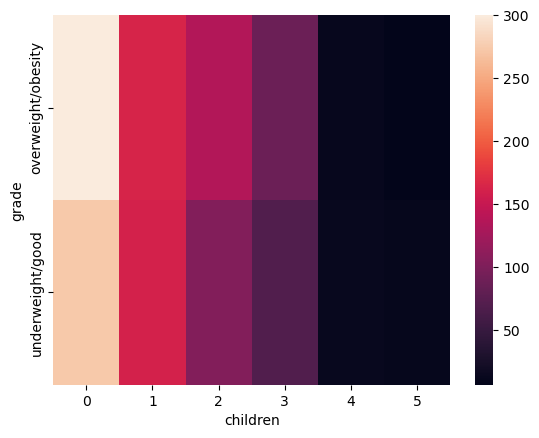

In [1788]:
sns.heatmap(contingency_table)

In [1789]:
contingency_table = pd.crosstab(df_assurance['sex'],df_assurance['smoker'])
contingency_table

smoker,no,yes
sex,,
female,547,115
male,516,159


<AxesSubplot:xlabel='smoker', ylabel='sex'>

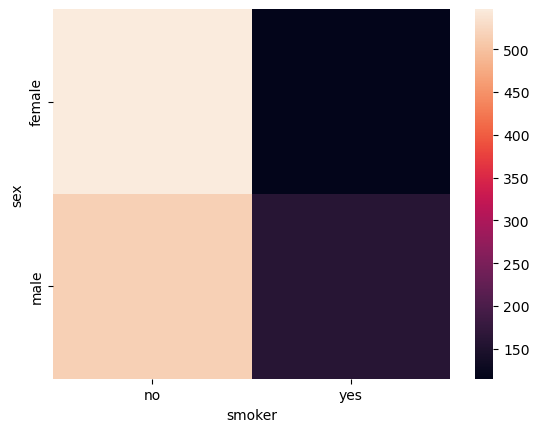

In [1790]:
sns.heatmap(contingency_table)

In [1791]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")
# p-value < 0.05
# degré liberté = 1 donc pour 5% chi2 doit etre sup a 3.841 (7.469) -> ok
# on accepte l'hypothese h1. -> Il y a une difference significative
# Le test chi2 montre qu'il y a une différence statistiquement significative entre le nombre de fumeurs et non-fumeurs en fonction du sexe. Ce résultat suggère que le sexe a un effet sur la probabilité de fumer.


chi2: 7.469, p-value: 0.006


In [1792]:
contingency_table = pd.crosstab(df_assurance['smoker'],df_assurance['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


<AxesSubplot:xlabel='region', ylabel='smoker'>

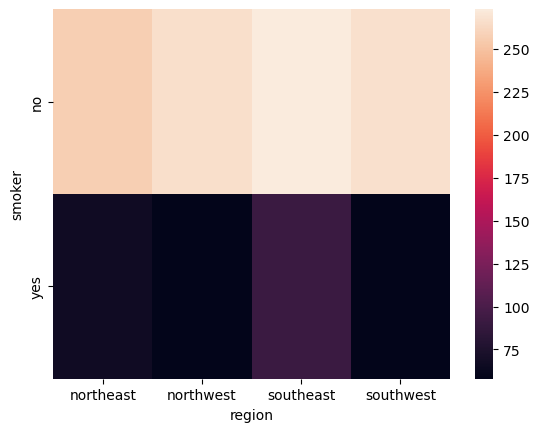

In [1793]:
sns.heatmap(contingency_table)

In [1794]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")
# p-value > 0.05
# on rejette l'hypothèse h0 -> Il n'y a pas de difference significative

chi2: 7.278, p-value: 0.064


In [1795]:
contingency_table = pd.crosstab(df_assurance['children'],df_assurance['smoker'])
contingency_table

smoker,no,yes
children,,
0,458,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


<AxesSubplot:xlabel='smoker', ylabel='children'>

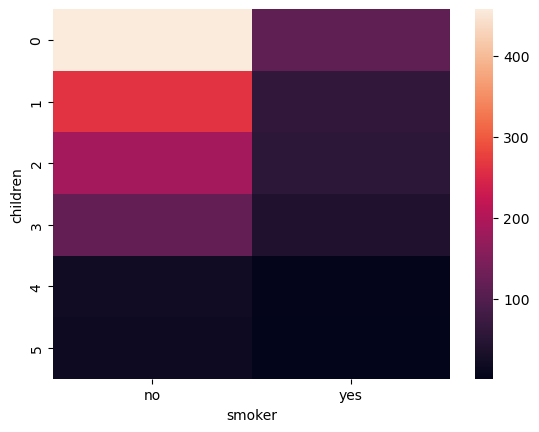

In [1796]:
sns.heatmap(contingency_table)

In [1797]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")
# p-value > 0.05
# on rejette l'hypothèse h0 -> Il n'y a pas de difference significative

chi2: 6.873, p-value: 0.230


In [1798]:
contingency_table = pd.crosstab(df_assurance['children'],df_assurance['region'])
contingency_table

region,northeast,northwest,southeast,southwest
children,,,,
0,147,131,157,138
1,77,74,95,78
2,51,66,66,57
3,39,46,35,37
4,7,6,5,7
5,3,1,6,8


<AxesSubplot:xlabel='region', ylabel='children'>

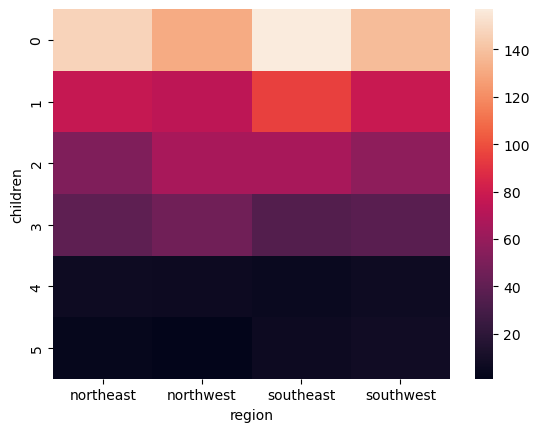

In [1799]:
sns.heatmap(contingency_table)

In [1800]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")
# p-value > 0.05
# on rejette l'hypothèse h0 -> Il n'y a pas de difference significative

chi2: 13.892, p-value: 0.534


In [1801]:
contingency_table = pd.crosstab(df_assurance['sex'],df_assurance['smoker'],values=df_assurance['charges'],aggfunc='mean')
contingency_table

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8099.700161,33042.005975


<AxesSubplot:xlabel='smoker', ylabel='sex'>

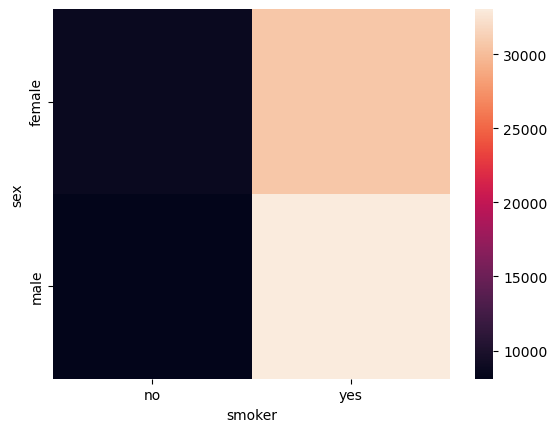

In [1802]:
sns.heatmap(contingency_table)

/tmp/ipykernel_39196/1648703687.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_assurance.corr())


<AxesSubplot:>

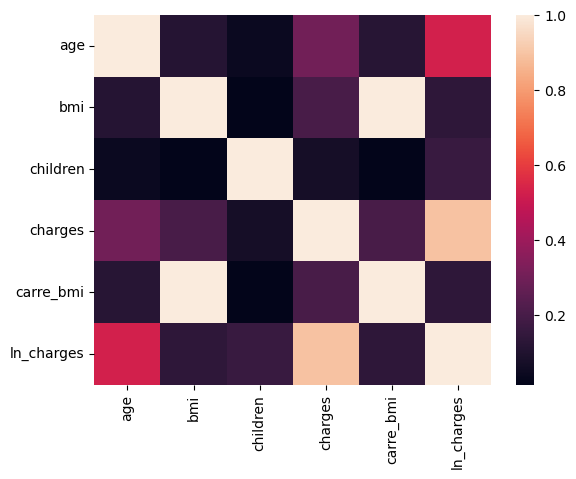

In [1803]:
sns.heatmap(df_assurance.corr())

In [1804]:
df_assurance.drop(['carre_bmi','ln_charges'],axis=1,inplace=True)
df_assurance.to_csv("csv/analyse_assurance.csv", index=False)

In [1805]:
# df.loc[df['bmi'] < 18.5 , 'grade'] = 'underweight'
# df.loc[df['bmi'].between(18.5, 25, 'left'), 'grade'] = 'good'
# df.loc[df['bmi'].between(25, 30, 'both'), 'grade'] = 'overweight'
# df.loc[df['bmi'] > 30, 'grade'] = 'obesity'
# df.drop('bmi',axis=1, inplace=True)